### Importing Necessary Libraries 

In [46]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam      #optimizer for training
from tensorflow.keras.models import Sequential    #sequential models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.metrics import SparseCategoricalAccuracy 
from tensorflow.keras.losses import SparseCategoricalCrossentropy  #loss function 
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

###  Labelling of dataset for each and every disease

In [7]:
class_names=['CommonRust','BlackSpot','BacterialSpot',"healthy","Powdery","Early_blight","Late_blight","Yellow_leaf_curl_virus","bacterial_blight"]
class_name_label={class_name:i for i,class_name in enumerate(class_names)}
no_of_class=len(class_names)
IMAGE_SIZE=(240,240)
print(class_name_label)

{'CommonRust': 0, 'BlackSpot': 1, 'BacterialSpot': 2, 'healthy': 3, 'Powdery': 4, 'Early_blight': 5, 'Late_blight': 6, 'Yellow_leaf_curl_virus': 7, 'bacterial_blight': 8}


### Load and Preprocess the dataset 

In [8]:
def load_data():
    dir_name=r"C:\Users\hp\Downloads\plantdiseases"
    category=["train","test"]
    output=[]
    for c in category:
        path=os.path.join(dir_name,c) #join paths
        print(path)
        images=[]
        labels=[]
        print(c)
        for d_name in os.listdir(path):
            label=class_name_label[d_name]
            for img in os.listdir(os.path.join(path,d_name)):
                try: 
                    img_path=os.path.join(os.path.join(path,d_name),img)
                    image=cv2.imread(img_path)
                    image=image.astype(np.float32)
                    image=image/255.0  #normalization 
                    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                    image=cv2.resize(image,IMAGE_SIZE)
                    images.append(image)
                    labels.append(label)
                except:
                    print(img_path,d_name)
        images=np.array(images,dtype='float32')
        labels=np.array(labels,dtype='int32')
        output.append((images,labels))
    return output

In [9]:
(train_images,train_labels),(test_images,test_labels)=load_data()

C:\Users\hp\Downloads\plantdiseases\train
train
C:\Users\hp\Downloads\plantdiseases\train\Early_blight\desktop.ini Early_blight
C:\Users\hp\Downloads\plantdiseases\train\Late_blight\desktop.ini Late_blight
C:\Users\hp\Downloads\plantdiseases\train\Yellow_leaf_curl_virus\desktop.ini Yellow_leaf_curl_virus
C:\Users\hp\Downloads\plantdiseases\test
test
C:\Users\hp\Downloads\plantdiseases\test\Early_blight\desktop.ini Early_blight
C:\Users\hp\Downloads\plantdiseases\test\Late_blight\desktop.ini Late_blight
C:\Users\hp\Downloads\plantdiseases\test\Yellow_leaf_curl_virus\desktop.ini Yellow_leaf_curl_virus


### Size of train and test dataset

In [10]:
train_images.shape

(7013, 240, 240, 3)

In [11]:
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8}

In [12]:
test_images.shape

(1247, 240, 240, 3)

In [13]:
set(test_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8}

### Shuffle The dataset

In [14]:
train_images,train_labels=shuffle(train_images,train_labels,random_state=42)

### Model Building: CNN(Convolutional Neural Networks) 

In [10]:
model=tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(240,240,3)),
    tf.keras.layers.MaxPooling2D(2,2),  
    
    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(9,activation=tf.nn.softmax)
])

In [21]:
#accuracy of overal model
model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(),
              metrics=[SparseCategoricalAccuracy()])

In [12]:
hist=model.fit(train_images,train_labels,batch_size=130,epochs=4,validation_split=0.2)

Epoch 1/4

44/44 [==============================] - 121s 2s/step - loss: 2.1408 - sparse_categorical_accuracy: 0.4544 - val_loss: 0.8009 - val_sparse_categorical_accuracy: 0.7177
Epoch 2/4
44/44 [==============================] - 89s 2s/step - loss: 0.5714 - sparse_categorical_accuracy: 0.8077 - val_loss: 0.5507 - val_sparse_categorical_accuracy: 0.8182
Epoch 3/4
44/44 [==============================] - 88s 2s/step - loss: 0.2701 - sparse_categorical_accuracy: 0.9135 - val_loss: 0.4496 - val_sparse_categorical_accuracy: 0.8532
Epoch 4/4
44/44 [==============================] - 92s 2s/step - loss: 0.1836 - sparse_categorical_accuracy: 0.9422 - val_loss: 0.4700 - val_sparse_categorical_accuracy: 0.8503


### Accuracy of model with 4 epochs

In [13]:
test=model.evaluate(test_images,test_labels) 

39/39 [==============================] - 5s 95ms/step - loss: 0.6221 - sparse_categorical_accuracy: 0.8059


### CNN With 6 epochs

In [23]:
model2=tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(240,240,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(9,activation=tf.nn.softmax)
])

In [24]:
model2.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(),
              metrics=[SparseCategoricalAccuracy()])

In [25]:
hist=model2.fit(train_images,train_labels,batch_size=130,epochs=6,validation_split=0.2)

Epoch 1/6

44/44 [==============================] - 202s 4s/step - loss: 2.2837 - sparse_categorical_accuracy: 0.4547 - val_loss: 0.8791 - val_sparse_categorical_accuracy: 0.7006
Epoch 2/6
44/44 [==============================] - 76s 2s/step - loss: 0.7153 - sparse_categorical_accuracy: 0.7570 - val_loss: 0.6519 - val_sparse_categorical_accuracy: 0.8004
Epoch 3/6
44/44 [==============================] - 75s 2s/step - loss: 0.4153 - sparse_categorical_accuracy: 0.8643 - val_loss: 0.5055 - val_sparse_categorical_accuracy: 0.8439
Epoch 4/6
44/44 [==============================] - 81s 2s/step - loss: 0.2270 - sparse_categorical_accuracy: 0.9314 - val_loss: 0.4861 - val_sparse_categorical_accuracy: 0.8411
Epoch 5/6
44/44 [==============================] - 95s 2s/step - loss: 0.1601 - sparse_categorical_accuracy: 0.9506 - val_loss: 0.4822 - val_sparse_categorical_accuracy: 0.8553
Epoch 6/6
44/44 [==============================] - 92s 2s/step - loss: 0.0830 - sparse_categorical_accuracy: 0.97

In [27]:
 loss2,acc2=model2.evaluate(test_images,test_labels) 

39/39 [==============================] - 4s 87ms/step - loss: 0.5817 - sparse_categorical_accuracy: 0.8356


### Accuracy of CNN Model with 6 epochs

In [28]:
print("accuracy score for test data by using CNN {}%".format(acc2))

accuracy score for test data by using CNN 0.8356054425239563%


In [30]:
predicted_labels = model2.predict(test_images)
predicted_labels = np.argmax(predicted_labels, axis=1)
print(predicted_labels)

39/39 [==============================] - 4s 78ms/step
[2 2 2 ... 7 7 7]


In [32]:
import pandas as pd
df=pd.DataFrame({"predicted":predicted_labels,"actual":test_labels})
df.head(5)

,predicted,actual
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2


### Comparasion between Predicted vs Actual Labels for each disease

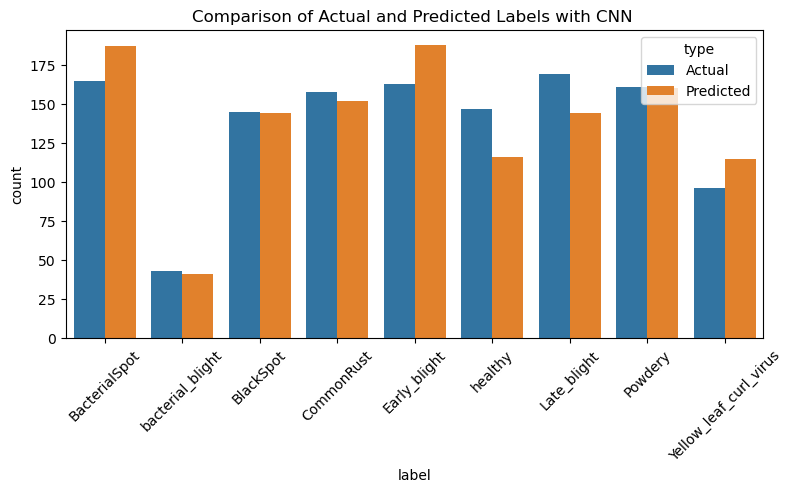

In [44]:
plt.figure(figsize=(9, 4))
sns.countplot(x='label', hue='type', data=pd.DataFrame({'label': actual_labels_str + predicted_labels_str, 'type': ['Actual'] * len(actual_labels_str) + ['Predicted'] * len(predicted_labels_str)}))
plt.xticks(rotation=45)
plt.title('Comparison of Actual and Predicted Labels with CNN ')
plt.show()

### Confusion Matrix for CNN Model Predictions VS Actuals 

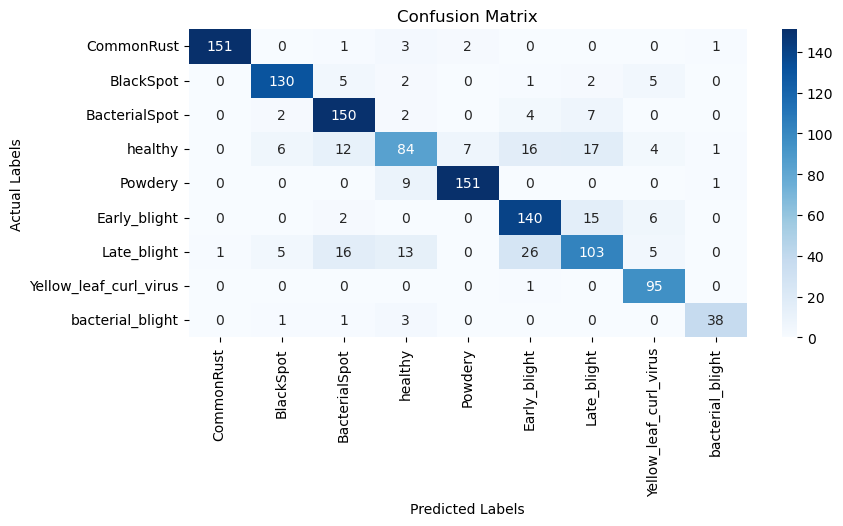

In [45]:

# Define the label mapping
label_mapping = {
    0: 'CommonRust', 1: 'BlackSpot', 2: 'BacterialSpot', 3: 'healthy', 4: 'Powdery', 5: 'Early_blight', 6: 'Late_blight', 7: 'Yellow_leaf_curl_virus', 8: 'bacterial_blight'
}

# Convert labels to their corresponding string names
predicted_labels_str = [label_mapping[label] for label in predicted_labels]
actual_labels_str = [label_mapping[label] for label in test_labels]

# Create confusion matrix
cm = confusion_matrix(actual_labels_str, predicted_labels_str, labels=list(label_mapping.values()))

# Plot confusion matrix
plt.figure(figsize=(9,4 ))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.values(), yticklabels=label_mapping.values())
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()



### Model Building for training data :MobileNetV2 

In [5]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(240, 240, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top
model_mobile = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation=tf.nn.relu),
    Dense(9, activation=tf.nn.softmax)
]) 

# Compile the model
model_mobile.compile(optimizer=Adam(),
                     loss=SparseCategoricalCrossentropy(),
                     metrics=[SparseCategoricalAccuracy()])

# Display the model summary
model_mobile.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 8, 8, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dense_1 (Dense)             (None, 9)                 1161      
                                                                 
Total params: 2423113 (9.24 MB)
Trainable params: 165129 (645.04 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [15]:
# Train the model
hist_mobile = model_mobile.fit(train_images, train_labels, batch_size=130, epochs=6, validation_split=0.2)

Epoch 1/6

44/44 [==============================] - 205s 4s/step - loss: 0.5464 - sparse_categorical_accuracy: 0.8305 - val_loss: 0.1995 - val_sparse_categorical_accuracy: 0.9344
Epoch 2/6
44/44 [==============================] - 171s 4s/step - loss: 0.1377 - sparse_categorical_accuracy: 0.9553 - val_loss: 0.1264 - val_sparse_categorical_accuracy: 0.9579
Epoch 3/6
44/44 [==============================] - 185s 4s/step - loss: 0.0921 - sparse_categorical_accuracy: 0.9711 - val_loss: 0.1042 - val_sparse_categorical_accuracy: 0.9672
Epoch 4/6
44/44 [==============================] - 162s 4s/step - loss: 0.0657 - sparse_categorical_accuracy: 0.9809 - val_loss: 0.0905 - val_sparse_categorical_accuracy: 0.9686
Epoch 5/6
44/44 [==============================] - 231s 5s/step - loss: 0.0440 - sparse_categorical_accuracy: 0.9913 - val_loss: 0.0791 - val_sparse_categorical_accuracy: 0.9758
Epoch 6/6
44/44 [==============================] - 176s 4s/step - loss: 0.0349 - sparse_categorical_accuracy:

### Loss and accuracy of MobileNetV2 Model

In [16]:
 loss2,acc2= model_mobile.evaluate(test_images,test_labels) 

39/39 [==============================] - 34s 869ms/step - loss: 0.1029 - sparse_categorical_accuracy: 0.9535


In [17]:
print(loss2)

0.10286799818277359


### Save the model

In [16]:
 model_pkl_file = "plantcare+.pkl"  
with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model_mobile, file)

### Load the model

In [47]:
 with open(model_pkl_file, 'rb') as file:  
    model = pickle.load(file)


### Predicted Labels VS Actual Labels for test images

In [ ]:
predicted_labels = model.predict(test_images)
predicted_labels = np.argmax(predicted_labels, axis=1)

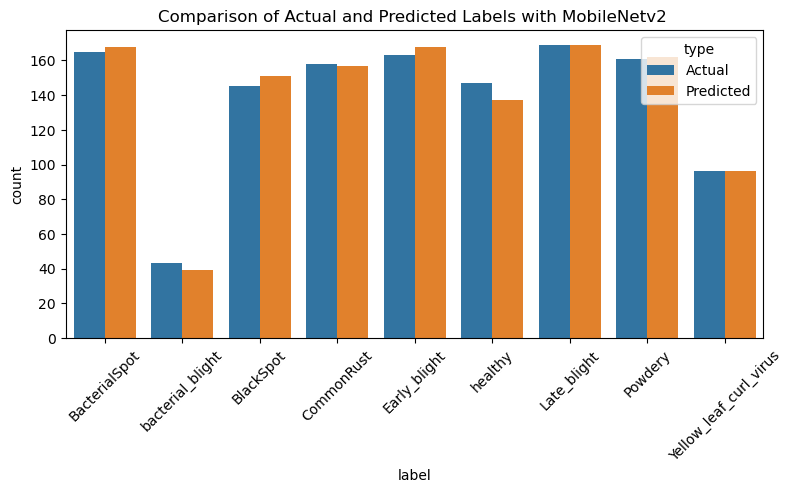

In [19]:
label_mapping = {
    0: 'CommonRust', 1: 'BlackSpot', 2: 'BacterialSpot', 3: 'healthy', 4: 'Powdery', 5: 'Early_blight', 6: 'Late_blight', 7: 'Yellow_leaf_curl_virus', 8: 'bacterial_blight'
}
predicted_labels_str = [label_mapping[label] for label in predicted_labels]
actual_labels_str = [label_mapping[label] for label in test_labels]
plt.figure(figsize=(9, 4))
sns.countplot(x='label', hue='type', data=pd.DataFrame({'label': actual_labels_str + predicted_labels_str, 'type': ['Actual'] * len(actual_labels_str) + ['Predicted'] * len(predicted_labels_str)}))
plt.xticks(rotation=45)
plt.title('Comparison of Actual and Predicted Labels with MobileNetv2 ')
plt.show()

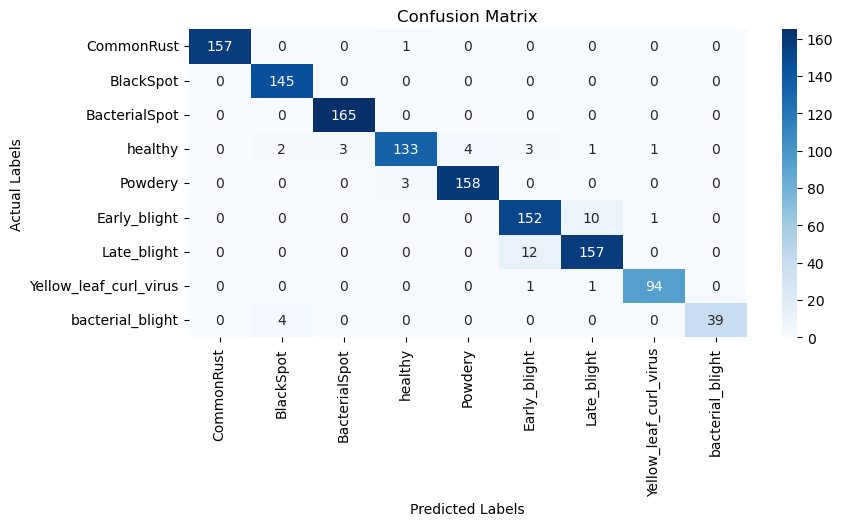

In [21]:
cm = confusion_matrix(actual_labels_str, predicted_labels_str, labels=list(label_mapping.values()))
# Plot confusion matrix
plt.figure(figsize=(9,4 ))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.values(), yticklabels=label_mapping.values())
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

### comparasion between the two models by accuracy scores with respect to epochs 

In [45]:
epochs=["epochs{}".format(i+1) for i in range(6)]
acc_cnn=[70.6,80.04,84.39,84.11,85.53,88.24]
acc_mobileNet=[93.1,95,96.,96.,97.5,97.1]
df=pd.DataFrame({"epochs":epochs,"validation_score_using CNN":acc,"validation_Score using MobileNetv2":acc_mobileNet})
df

,epochs,validation_score_using CNN,validation_Score using MobileNetv2
0,epochs1,70.60,93.1
1,epochs2,80.04,95.0
2,epochs3,84.39,96.0
3,epochs4,84.11,96.0
4,epochs5,85.53,97.5
5,epochs6,88.24,97.1


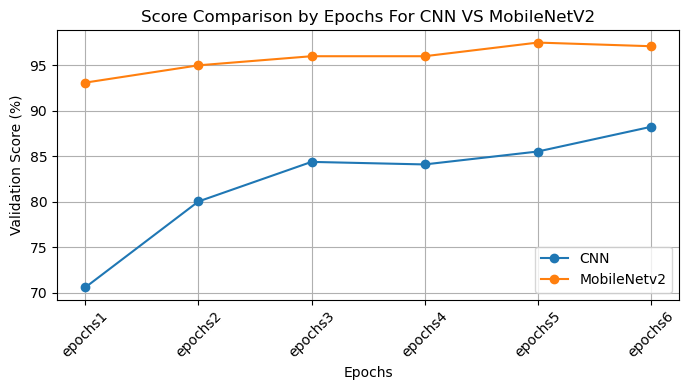

In [53]:
plt.figure(figsize=(7, 4))

plt.plot(epochs, acc_cnn, marker='o', label='CNN')
plt.plot(epochs, acc_mobileNet, marker='o', label='MobileNetv2')

plt.title('Score Comparison by Epochs For CNN VS MobileNetV2')
plt.xlabel('Epochs')
plt.ylabel('Validation Score (%)')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### MultiClass Classification

In [2]:
def preprocess_image(image_path):
    # Load and preprocess the image
    image = cv2.imread(image_path)
    image = image.astype(np.float32)
    image = image / 255.0
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMAGE_SIZE)
    image = np.expand_dims(image, axis=0)  # Add batch dimension beacuse test or train in NNetwork on batches 
    return image

In [10]:
def predict_top_labels(image_path, top_k=3):
    input_image = preprocess_image(image_path)

    # Make predictions and get 1st index means our image in batch
    predictions = model.predict(input_image)[0]

    # Get the indices of the top k predictions
    top_indices = np.argsort(predictions)[-top_k:][::-1]

    # Get the class names and probabilities
    top_labels = [class_names[i] for i in top_indices]
    top_probabilities = [predictions[i] for i in top_indices]

    return top_labels, top_probabilities

# Example usage
image_path = r"C:\Users\hp\Downloads\plantdiseases\test\Powdery\ce792e35b06ab151.jpg"
top_labels, top_probabilities = predict_top_labels(image_path)

# Display the top 3 labels and their probabilities
for label, probability in zip(top_labels, top_probabilities):
    print(f"{label}: {probability * 100:.2f}%")

1/1 [==============================] - 2s 2s/step
Powdery: 99.58%
healthy: 0.35%
BlackSpot: 0.06%
